In [5]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime
from scipy.stats import linregress
# Files to Load
file1_to_load = "Resources/us_states.csv"
file2_to_load = "Resources/Anxiety_data.csv"

# Read CSV Files and store into Pandas data frames
covid_data = pd.read_csv(file1_to_load)
anxiety_data = pd.read_csv(file2_to_load)

#Display DataFrames for Covid and Anxiety data
display('Covid Data:', covid_data.head())
display('Anxiety Data:',anxiety_data.head())


'Covid Data:'

,date,state,fips,cases,deaths
0,1/21/2020,Washington,53,1,0
1,1/22/2020,Washington,53,1,0
2,1/23/2020,Washington,53,1,0
3,1/24/2020,Illinois,17,1,0
4,1/24/2020,Washington,53,1,0


'Anxiety Data:'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [6]:
del covid_data['fips']
covid_data

,date,state,cases,deaths
0,1/21/2020,Washington,1,0
1,1/22/2020,Washington,1,0
2,1/23/2020,Washington,1,0
3,1/24/2020,Illinois,1,0
4,1/24/2020,Washington,1,0
...,...,...,...,...
23054,4/25/2021,Virginia,654210,10691
23055,4/25/2021,Washington,397006,5478
23056,4/25/2021,West Virginia,151382,2821
23057,4/25/2021,Wisconsin,656668,7473


In [7]:
del anxiety_data['Group']
del anxiety_data['Subgroup']
del anxiety_data['Phase']
del anxiety_data['Time Period']
del anxiety_data['Time Period Label']
del anxiety_data['Time Period End Date']
del anxiety_data['Low CI']
del anxiety_data['High CI']
del anxiety_data['Confidence Interval']
del anxiety_data['Quartile Range']

#change the date format of anxiety_data to match covid_data's
anxiety_data['Time Period Start Date'] = anxiety_data['Time Period Start Date'].apply(lambda dateStr:dateStr.split()[0])

#change column names to assist merge and be meaningful
anxiety_data_renamed = anxiety_data.rename(columns={'State':'state',"Indicator":"mental disorder","Value":"frequency of mental disorder","Time Period Start Date":"date"})
anxiety_data_renamed

,mental disorder,state,date,frequency of mental disorder
0,Symptoms of Depressive Disorder,United States,4/23/2020,23.5
1,Symptoms of Depressive Disorder,United States,4/23/2020,32.7
2,Symptoms of Depressive Disorder,United States,4/23/2020,25.7
3,Symptoms of Depressive Disorder,United States,4/23/2020,24.8
4,Symptoms of Depressive Disorder,United States,4/23/2020,23.2
...,...,...,...,...
5779,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,3/17/2021,31.4
5780,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,3/17/2021,35.6
5781,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,3/17/2021,41.0
5782,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,3/17/2021,32.3


In [8]:
#merge data based on states
merged_data = covid_data.merge(anxiety_data_renamed,how="inner", on = ["state","date"])
#create csv data of merged
merged_data.to_csv("Resources/merged_data.csv")
#display merged data
display(merged_data)


,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


,cases,deaths,frequency of mental disorder
state,,,
Alabama,1.739869e+05,3081.555556,32.496296
Alaska,1.789378e+04,86.259259,31.638272
Arizona,2.708545e+05,5512.000000,33.493827
Arkansas,1.061795e+05,1719.148148,34.324691
California,1.112002e+06,17291.148148,34.827160
Colorado,1.413653e+05,2698.222222,32.427160
Connecticut,1.005303e+05,4809.777778,31.117284
Delaware,3.003611e+04,665.481481,29.080247
District of Columbia,1.782200e+04,622.555556,32.238272


<IPython.core.display.Javascript object>


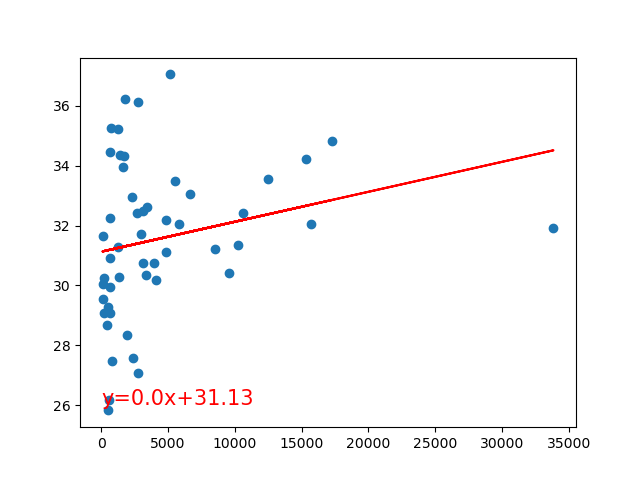

Text(18, 26, 'y=0.0x+31.13')

In [14]:
#Questions: Has COVID_19 affected the mental health of Americans? 
            #Are areas high COVID-19 deaths more impacted by mental health issues? 
            #Do areas with low COVID-19 rates have lower rates of mental health issues? 

#group merged data by state
group_by_state=merged_data.groupby(["state"])
#get the mean
group_by_state_mean=group_by_state.mean()
#display the mean
display(group_by_state_mean)
#scatter plot the deaths and the frequency of mental disorder
x=group_by_state_mean["deaths"]
y=group_by_state_mean["frequency of mental disorder"]
plt.scatter(x,y)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,28),fontsize=15,color="red")




<IPython.core.display.Javascript object>


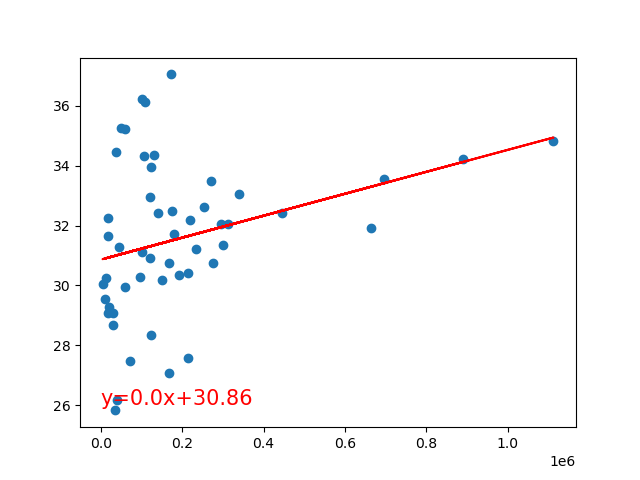

Text(18, 26, 'y=0.0x+30.86')

In [15]:
#scatter plot the cases and the frequency of mental disorder

x=group_by_state_mean["cases"]
y=group_by_state_mean["frequency of mental disorder"]
plt.scatter(x,y)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,28),fontsize=15,color="red")



,date,state,cases,deaths,mental disorder,frequency of mental disorder
30,4/23/2020,Georgia,20905,871,Symptoms of Depressive Disorder,25.6
31,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder,31.9
32,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder or Depressive Dis...,36.2
183,5/7/2020,Georgia,30524,1332,Symptoms of Depressive Disorder,25.6
184,5/7/2020,Georgia,30524,1332,Symptoms of Anxiety Disorder,29.5
...,...,...,...,...,...,...
3856,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder,27.1
3857,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder or Depressive Dis...,33.2
4008,3/17/2021,Georgia,1013340,17801,Symptoms of Depressive Disorder,25.1
4009,3/17/2021,Georgia,1013340,17801,Symptoms of Anxiety Disorder,34.0


,cases,deaths,frequency of mental disorder
date,,,
4/23/2020,20905,871,31.233333
5/7/2020,30524,1332,29.800000
5/14/2020,34422,1521,28.666667
5/21/2020,38969,1749,32.600000
5/28/2020,43363,1942,30.366667
6/4/2020,47528,2116,31.333333
6/11/2020,52332,2337,32.033333
6/18/2020,58040,2565,32.266667
6/25/2020,67796,2704,36.366667


<IPython.core.display.Javascript object>


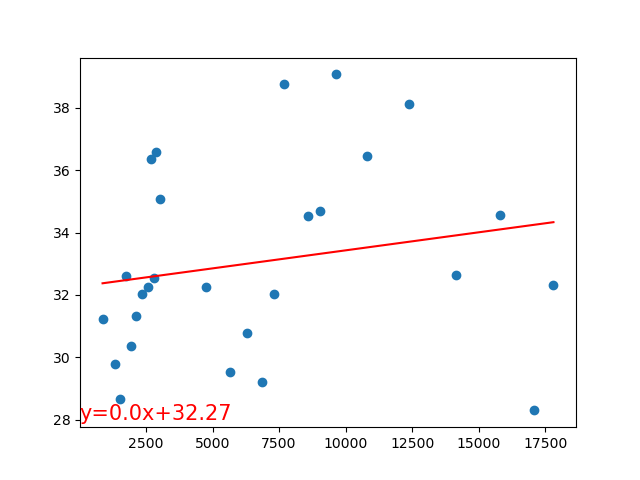

Text(18, 28, 'y=0.0x+32.27')

In [20]:
#How has Georgia been impacted?
#get georgia data
georgia_data=merged_data.loc[merged_data["state"]=="Georgia"]
#display georgia data
display(georgia_data)
#group georgia data by date
georgia_data_group_by_date=georgia_data.groupby(["date"],sort=False)
#get the mean
georgia_data_group_by_date_mean=georgia_data_group_by_date.mean()
#display mean data
display(georgia_data_group_by_date_mean)
#scatter plot deaths and frequency of mental disorder
x=georgia_data_group_by_date_mean["deaths"]
y=georgia_data_group_by_date_mean["frequency of mental disorder"]
plt.scatter(x,y)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(x,y)
regress_values=x*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(18,28),fontsize=15,color="red")

